In [17]:
import sys
sys.path.append('../reduction')
import numpy as np
import matplotlib.pyplot as plt
import HST_extraction as ext
from scipy.interpolate import interp1d

In [14]:
## load in the paths to the data
FPload = np.load('../reduction/FilePaths.npz', allow_pickle=True)
datapaths = FPload['filedict'].item()   # dictionary containing paths to the image files

## testing on the direct image of the 2nd orbit
dimg_path = datapaths['visit3']['orbit2']['direct']
# getting the parameters of the wavelength solution
wavesolution = ext.WavelengthSolution(dimg_path)
# setting up an array to act as the dispersion axis (522 pixels long)
disp_axis_full = np.arange(522.0)
g141_minwave = 9708.
g141_maxwave = 17904 # min and max wavelengths covered by the G141 grism
# what pixels do these wavelengths correspond to?
g141_minpix, g141_maxpix = ext.GetExtractRange(g141_minwave, g141_maxwave, dimg_path, 0)
# computing the wavelength -> pixel function
waveFunc = wavesolution[0] + wavesolution[1]*(disp_axis_full - wavesolution[2])

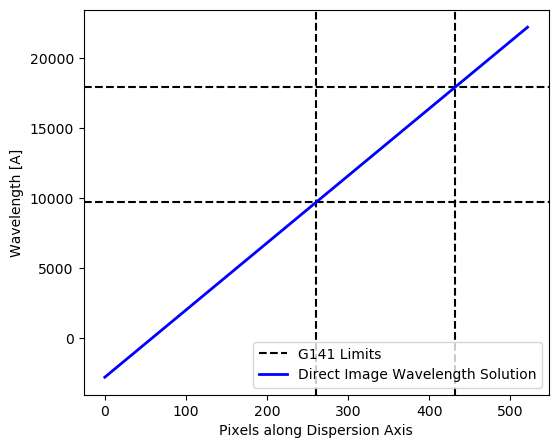

In [16]:
fig, ax = plt.subplots(figsize=(6,5))
ax.axhline(g141_minwave, c='black', ls='--')
ax.axhline(g141_maxwave, c='black', ls='--', label='G141 Limits')
ax.axvline(g141_minpix, c='black', ls='--')
ax.axvline(g141_maxpix, c='black', ls='--')
ax.plot(disp_axis_full, waveFunc, lw=2, c='blue', label='Direct Image Wavelength Solution')
ax.set(xlabel='Pixels along Dispersion Axis', ylabel='Wavelength [A]')
ax.legend(loc='lower right')
plt.show()

In [22]:
# since the wavelength solution is linear, we can create a linear interpolation in order
#   to turn it into a callable function
# waveInterp takes pixel as input and returns the corresponding wavelength in [A]
waveInterp = interp1d(disp_axis_full, waveFunc, kind='linear')

In [25]:
# let's test what change a 1 pixel change amounts to in wavelength space
test_pixel = 350
d_pixel = 4
d_wave_A = waveInterp(test_pixel) - waveInterp(test_pixel-d_pixel)
d_wave_um = d_wave_A / 10000.

print('When at pixel %d on the dispersion axis'%(test_pixel))
print('A %d pixel shift corresponds to a %.5f micron shift'%(d_pixel, d_wave_um))

When at pixel 350 on the dispersion axis
A 4 pixel shift corresponds to a 0.01917 micron shift


In [12]:
# getting the values of the solution within the G141 space
g141_idxs = np.where((disp_axis_full >= g141_minwave) & (disp_axis_full <= g141_maxwave))[0]
g141_waves = disp_axis_full[g141_idxs]
g141_soln = waveFunc[g141_idxs]


In [13]:
g141_waves

array([], dtype=float64)